In [1]:
library(tidyverse)
library('palmerpenguins')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
options(repr.plot.res=250)

Y-axis of ecdf can be count, fraction, percentile: all result in same shape


In [3]:
penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [21]:
df_ecdf=penguins|>
    filter(species=='Adelie')|>
    arrange(body_mass_g)|>
    mutate(n=row_number(),#n column ranks body mass
           fraction_of_penguins=n/n(), #n() calls the number of rows in our table, alt can use max(n)
            percentile=percent_rank(body_mass_g))

df_ecdf |> head()

# df_ecdf|>pull(species)|>table()
#counts Adelie values
#df_ecdf|>tail() looks at end of table

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,n,fraction_of_penguins,percentile
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>
Adelie,Biscoe,36.5,16.6,181,2850,female,2008,1,0.006578947,0.00000000
Adelie,Biscoe,36.4,17.1,184,2850,female,2008,2,0.013157895,0.00000000
Adelie,Biscoe,34.5,18.1,187,2900,female,2008,3,0.019736842,0.01333333
Adelie,Dream,33.1,16.1,178,2900,female,2008,4,0.026315789,0.01333333
Adelie,Torgersen,38.6,17.0,188,2900,female,2009,5,0.032894737,0.01333333
Adelie,Biscoe,37.9,18.6,193,2925,female,2009,6,0.039473684,0.03333333


In [20]:
x<-c(5,1,3,2,2)

percent_rank(x)
#returns percentile for each value(...?), can use as a y-axis metric

[1] 1.00 0.00 0.75 0.25 0.25

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_step()`).”


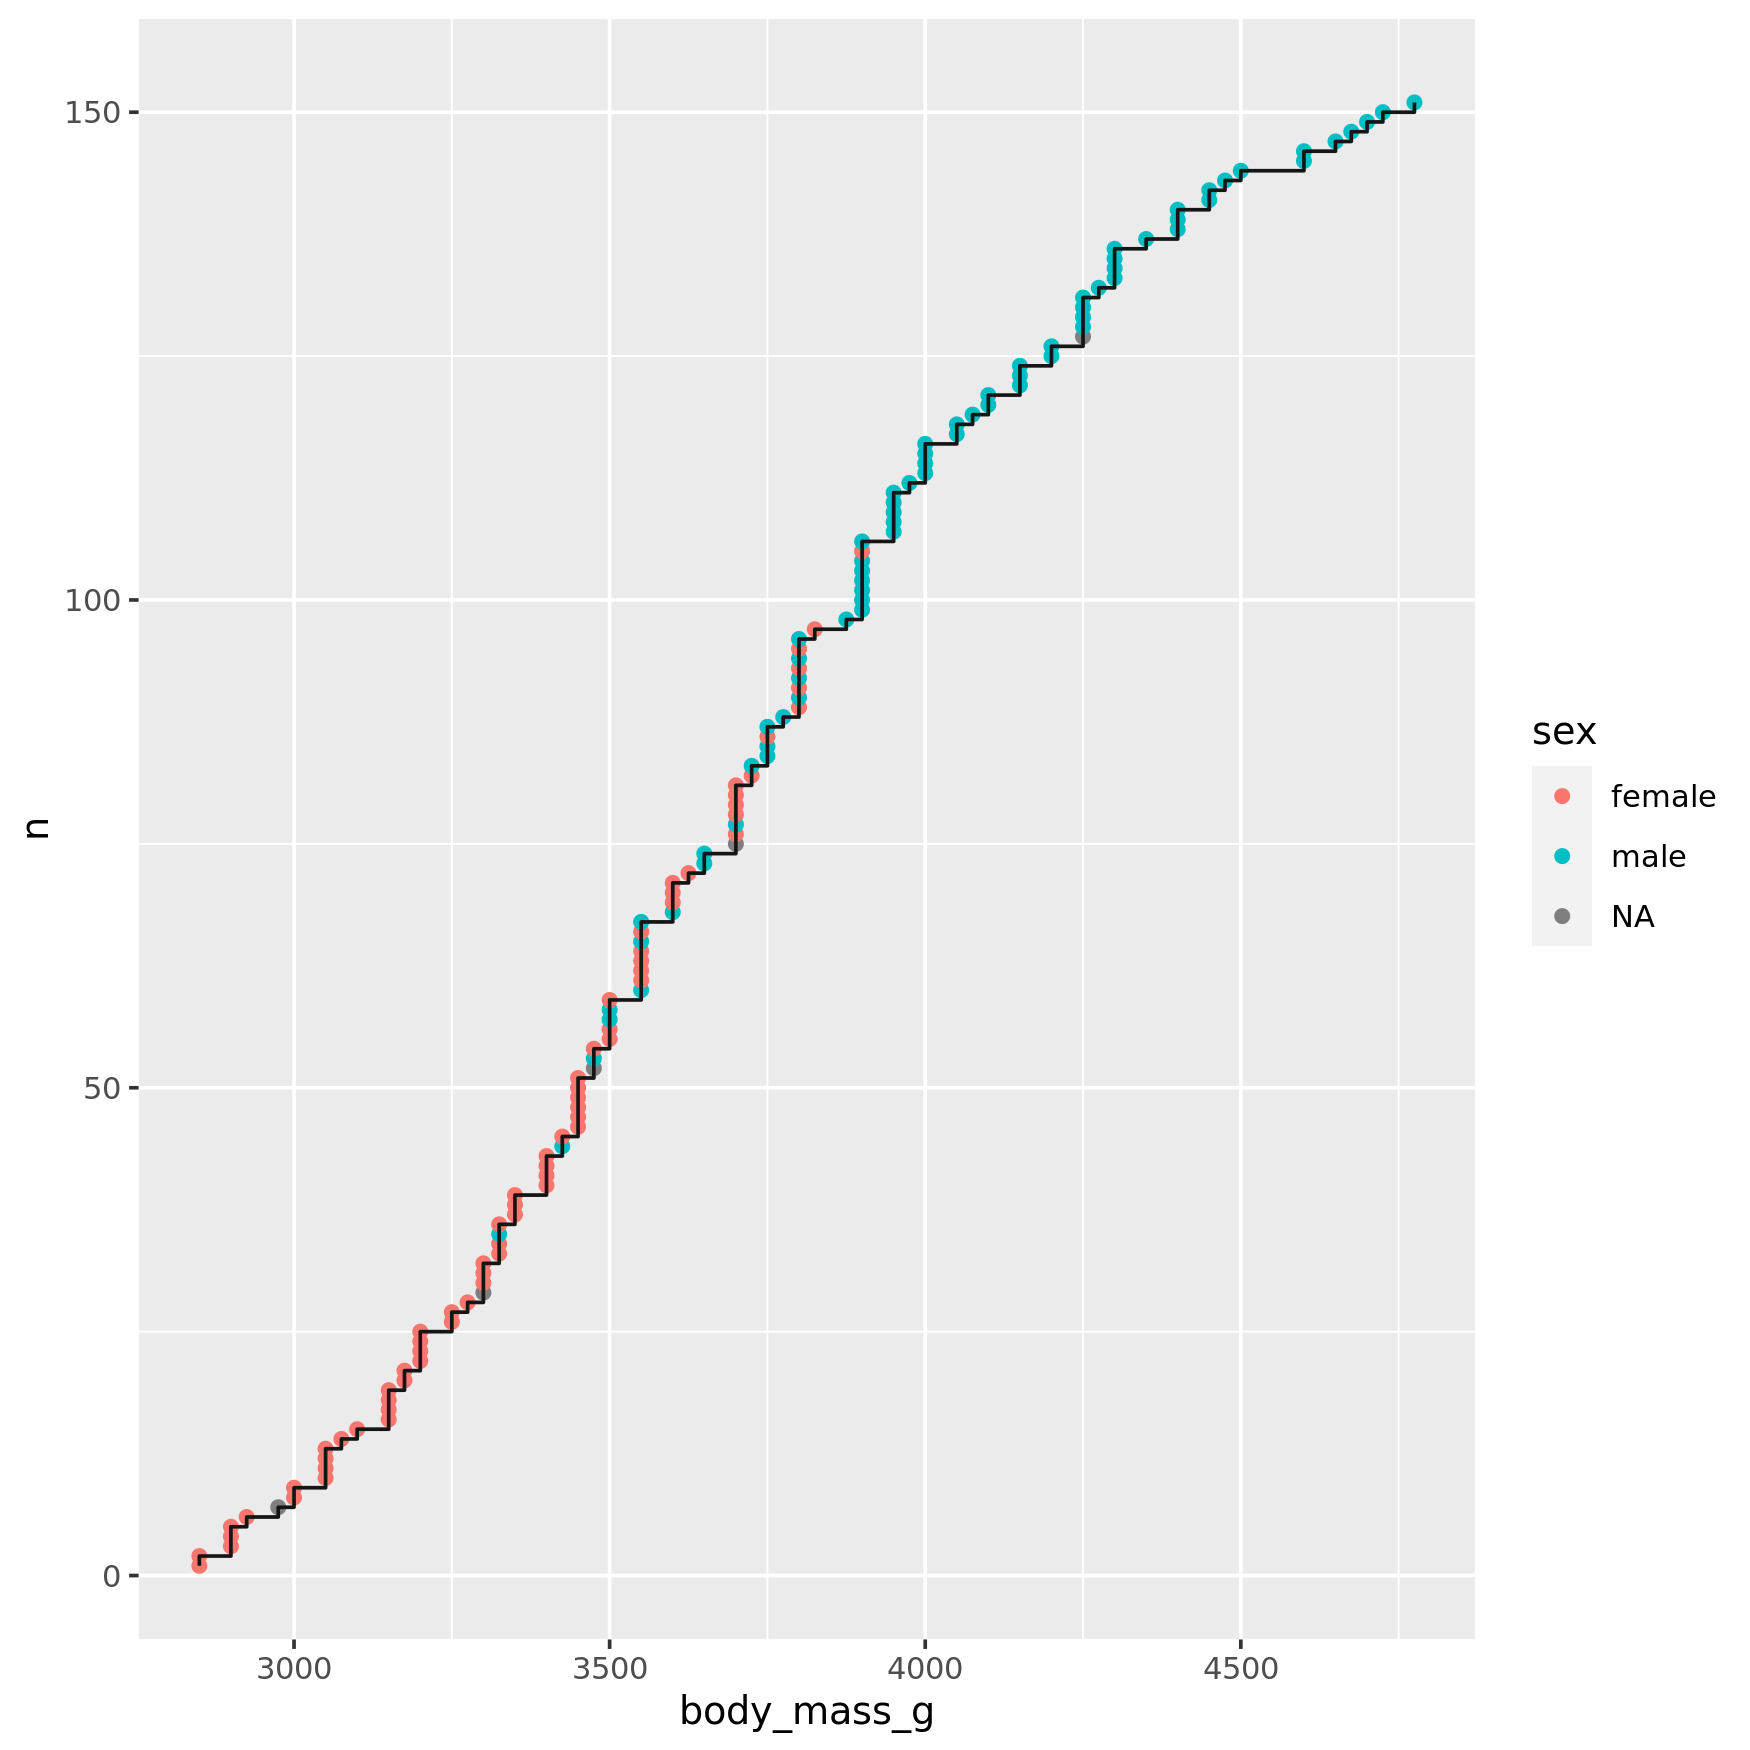

In [17]:
#as count

p=ggplot(df_ecdf,aes(x=body_mass_g,y=n,color=sex,group=1))+
    geom_point()+
    geom_step(color='#151515')#use geom_step instead of geom_line because this data is discrete

p


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_step()`).”


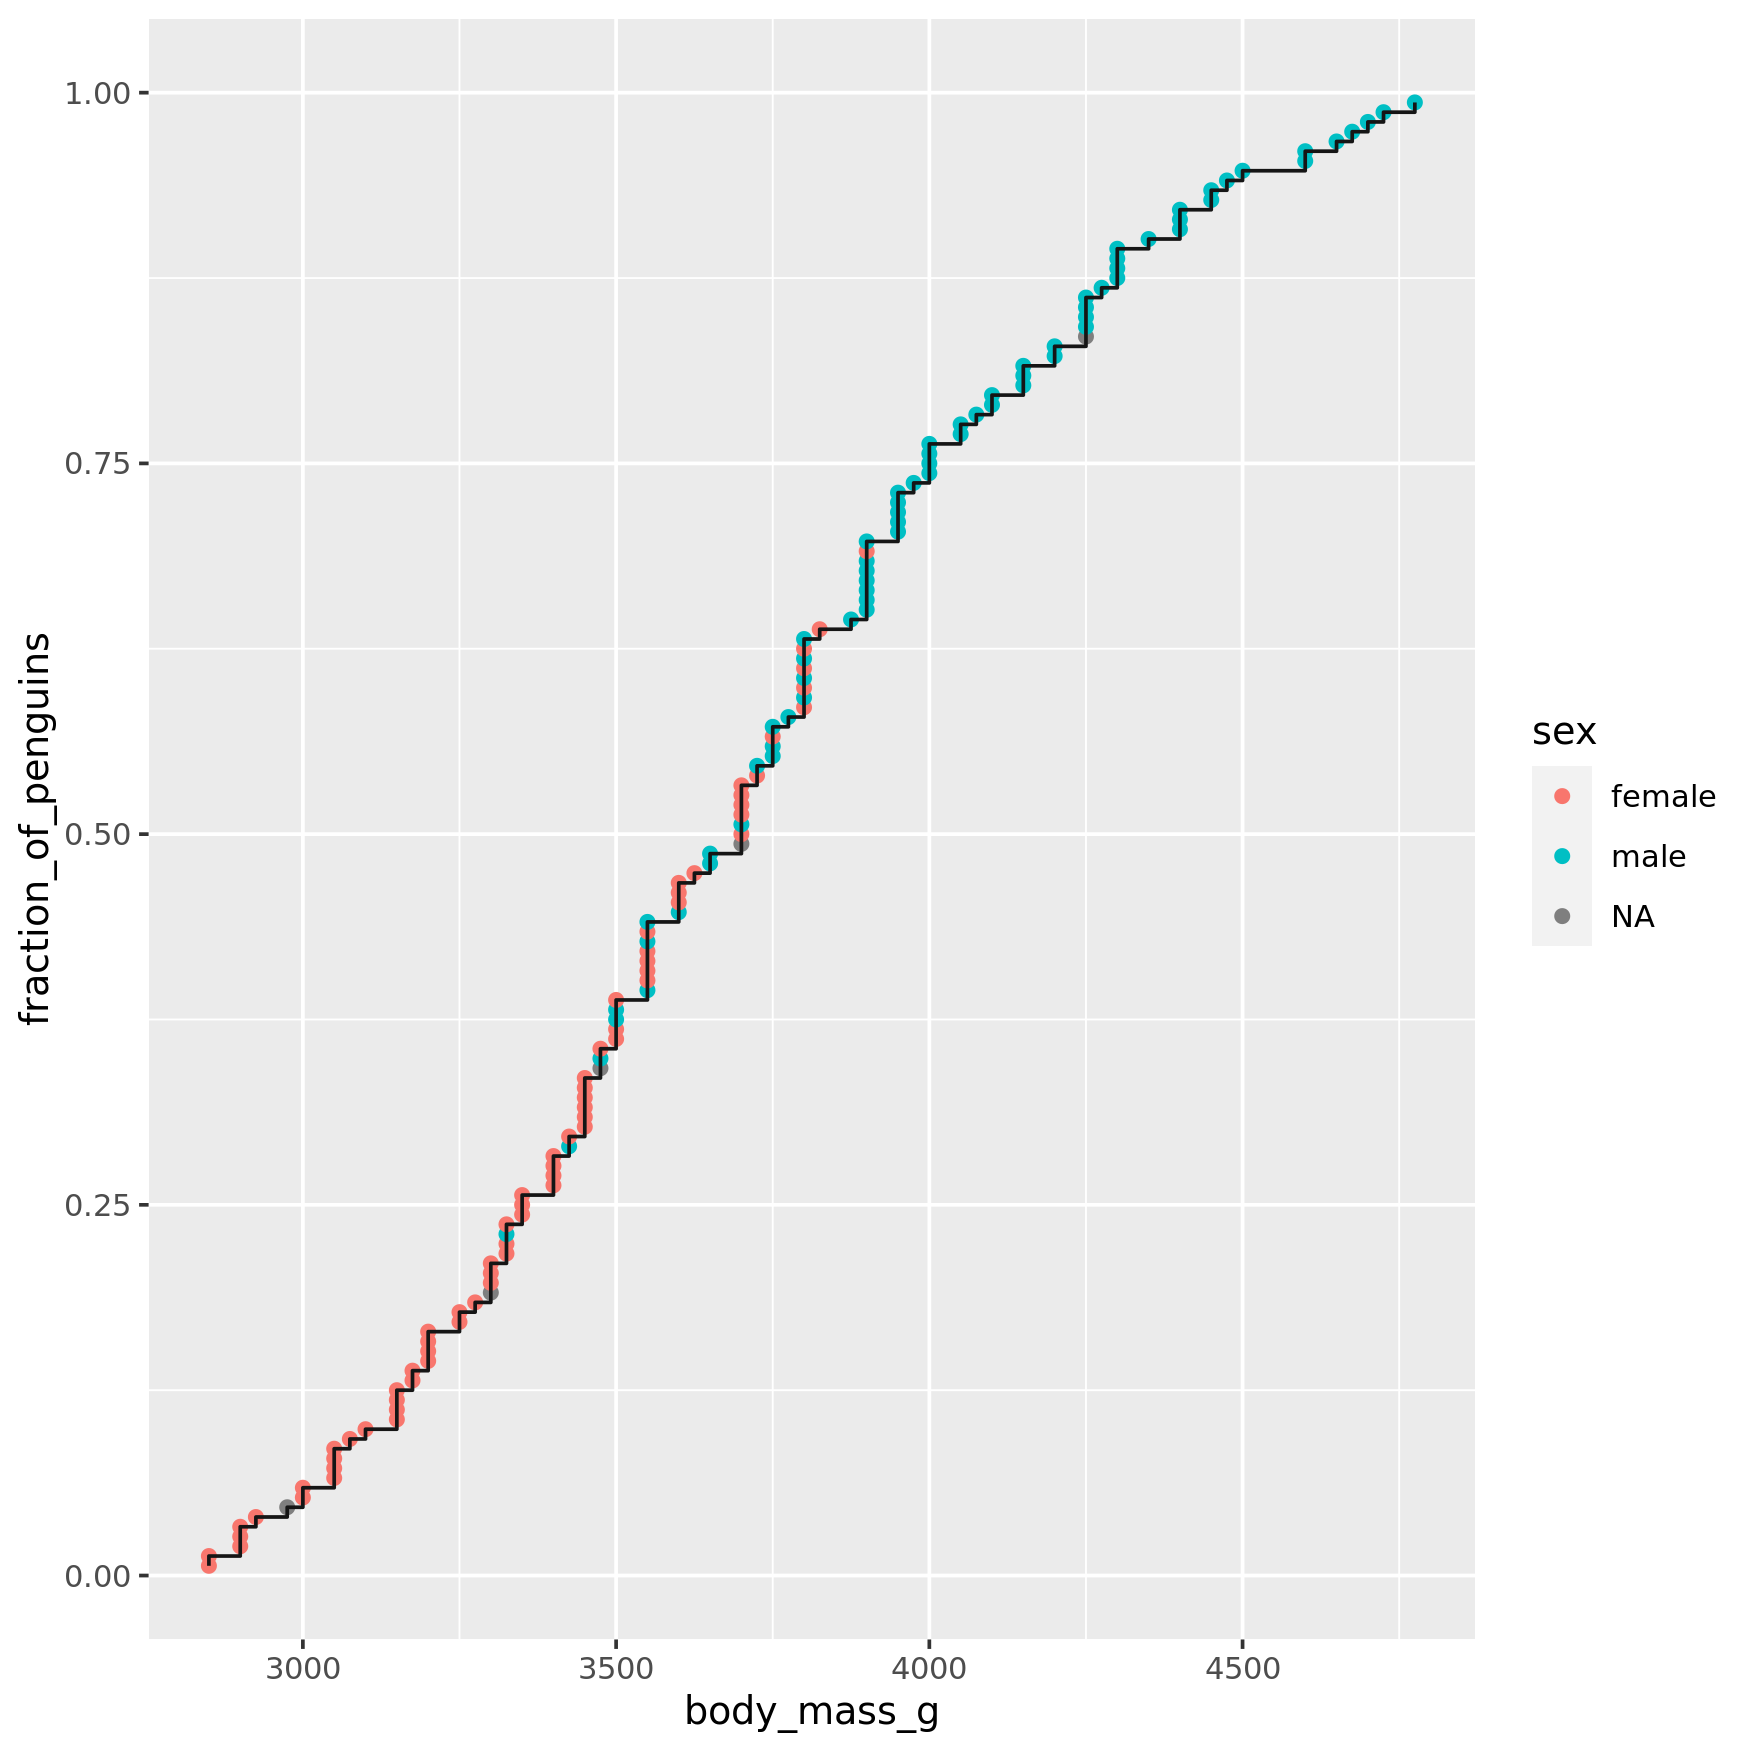

In [19]:
#as fraction

p=ggplot(df_ecdf,aes(x=body_mass_g,y=fraction_of_penguins,color=sex,group=1))+
    geom_point()+
    geom_step(color='#151515')#use geom_step instead of geom_line because this data is discrete

p
